In [60]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

(x_train_image, y_train_label),(x_test_image, y_test_label) = mnist.load_data() 
orlabel = y_train_label
y_train_label = to_categorical(y_train_label)
x_train_image = np.expand_dims(x_train_image.astype('float32')/255,-1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

cnn = Sequential()
cnn.add(Conv2D(32,(4,4),activation='relu', padding='same', input_shape=(28,28,1)))

cnn.add(Dropout(0.2))

cnn.add(Conv2D(64,(3,3),activation='relu', padding='same'))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(128,(2,2),activation='relu', padding='same'))
cnn.add(Dropout(0.2))

cnn.add(Flatten())
cnn.add(Dropout(0.2))

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        544       
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)           

In [ ]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [9]:
history = cnn.fit(x=x_train_image, y=y_train_label, batch_size=200, epochs=10, validation_split=0.2)

Epoch 1/10
240/240 [==============================] - 522s 2s/step - loss: 0.2745 - acc: 0.9142 - val_loss: 0.0577 - val_acc: 0.9821
Epoch 2/10
240/240 [==============================] - 517s 2s/step - loss: 0.0928 - acc: 0.9721 - val_loss: 0.0515 - val_acc: 0.9847
Epoch 3/10
240/240 [==============================] - 521s 2s/step - loss: 0.0689 - acc: 0.9795 - val_loss: 0.0478 - val_acc: 0.9860
Epoch 4/10
240/240 [==============================] - 520s 2s/step - loss: 0.0539 - acc: 0.9836 - val_loss: 0.0416 - val_acc: 0.9889
Epoch 5/10
240/240 [==============================] - 519s 2s/step - loss: 0.0463 - acc: 0.9852 - val_loss: 0.0413 - val_acc: 0.9888
Epoch 6/10
240/240 [==============================] - 519s 2s/step - loss: 0.0422 - acc: 0.9869 - val_loss: 0.0416 - val_acc: 0.9905
Epoch 7/10
240/240 [==============================] - 521s 2s/step - loss: 0.0311 - acc: 0.9900 - val_loss: 0.0397 - val_acc: 0.9889
Epoch 8/10
240/240 [==============================] - 519s 2s/step - 

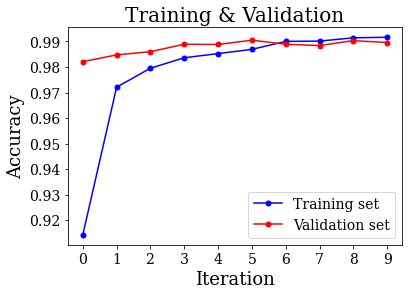

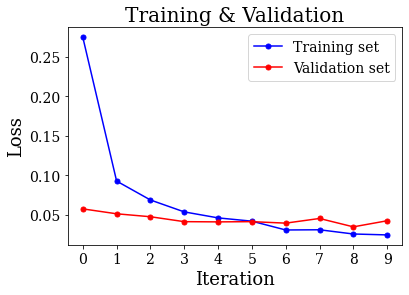

In [57]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.rcParams["font.family"] = "serif"
plt.title("Training & Validation", fontsize=20)
plt.xlabel("Iteration", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.plot(np.arange(len(acc)), acc,color='b', label="Training set", marker='o', markersize=5)
plt.plot(np.arange(len(val_acc)), val_acc,color='r', label="Validation set", marker='o', markersize=5)
plt.xticks(np.linspace(0,9,10,endpoint=True),fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right',fontsize=14)
plt.show()

plt.title("Training & Validation", fontsize=20)
plt.xlabel("Iteration", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.plot(np.arange(len(loss)), loss,color='b', label="Training set", marker='o', markersize=5)
plt.plot(np.arange(len(val_loss)), val_loss,color='r', label="Validation set", marker='o', markersize=5)
plt.xticks(np.linspace(0,9,10,endpoint=True),fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right',fontsize=14)
plt.show()

In [62]:
train_loss, train_acc = cnn.evaluate(x_train_image, y_train_label)
print("訓練集的準確度為：%0.4f" %(train_acc))
print("訓練集的損失值為：%0.4f" %(train_loss))

1875/1875 [==============================] - 121s 64ms/step - loss: 0.0120 - acc: 0.9968
訓練集的準確度為：0.9968
訓練集的損失值為：0.0120


Text(0.5, 1.0, 'Accuracy: 0.9968')

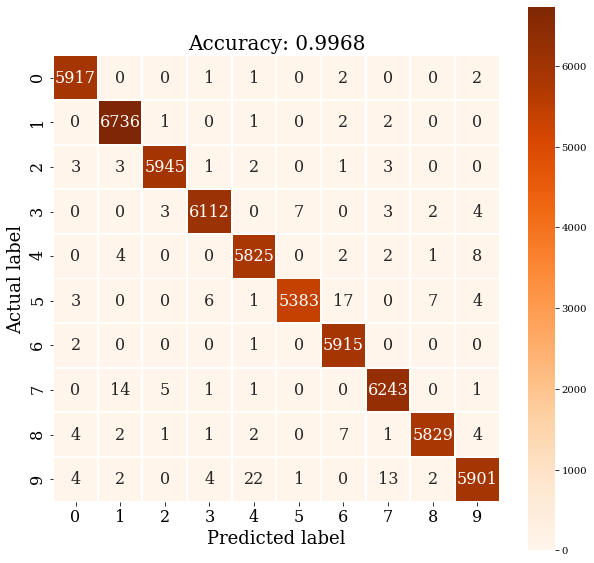

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

predict = cnn.predict(x_train_image)
predictions = [np.argmax(one_hot)for one_hot in predict]

cm = confusion_matrix(orlabel, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1.0, square = True, cmap = 'Oranges',annot_kws={"size": 16})
plt.ylabel('Actual label', size = 18)
plt.xlabel('Predicted label', size = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Accuracy: %0.4f' %(train_acc), size = 20)

In [59]:
from keras.models import load_model

cnn.save('cnn_mnist.h5')

from tensorflow.keras.models import load_model

cnn = load_model('cnn_mnist.h5')